In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import json
import numpy as np
import pymatgen as pymat
import mendeleev as mendel
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from random import shuffle
import matplotlib.pyplot as plt

# Get all the elements 
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg',
            'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr',
            'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br',
            'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag',
            'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'Hf', 'Ta', 'W',
            'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'La', 'Ce', 'Pr',
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
            'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']

data_youngs_modulus = []
data_lattice_constant = []
data_melting_point = []
data_specific_heat = []
data_atomic_mass = []
data_CTE = []
data_electrical_resistivity = []
data_atomic_radius = []
data_density_of_solid = []
data_poissons_ratio = []

for item in elements:
    data_youngs_modulus.append(pymat.Element(item).youngs_modulus)
    data_lattice_constant.append(mendel.element(item).lattice_constant)
    data_melting_point.append(mendel.element(item).melting_point)
    data_specific_heat.append(mendel.element(item).specific_heat)
    data_atomic_mass.append(pymat.Element(item).atomic_mass)
    data_CTE.append(pymat.Element(item).coefficient_of_linear_thermal_expansion)
    data_electrical_resistivity.append(pymat.Element(item).electrical_resistivity)
    data_atomic_radius.append(pymat.Element(item).atomic_radius)
    data_density_of_solid.append(pymat.Element(item).density_of_solid)
    data_poissons_ratio.append(pymat.Element(item).poissons_ratio)
    

# Add the element data
data = list(zip(elements, data_youngs_modulus, data_lattice_constant, data_melting_point, data_specific_heat, data_atomic_mass, 
                data_CTE, data_electrical_resistivity, data_atomic_radius, data_density_of_solid, data_poissons_ratio))

# Labels for a future dataframe
data_labels = ['element', 'youngs_modulus', 'lattice_constant', 'melting_point', 'specific_heat', 'atomic_mass', 'CTE', 'electrical_resistivity', 
               'atomic_radius', 'density_of_solid', 'poissons_ratio']


querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point", "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat"]
querable_pymatgen = ["atomic_mass", "atomic_radius", "electrical_resistivity","molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid", "coefficient_of_linear_thermal_expansion"]

Using TensorFlow backend.


In [87]:
# Now, we can create a dataframe of all the elemental data
edf = pd.DataFrame(data, columns = data_labels)
edf.head(20)

,element,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,H,NaN,3.750,14.01,NaN,1.007940,NaN,NaN,0.25,NaN,NaN
1,He,NaN,3.570,0.95,5.188,4.002602,NaN,NaN,NaN,NaN,NaN
2,Li,4.9,3.490,553.69,3.489,6.941000,0.000046,9.500000e-08,1.45,535.0,NaN
3,Be,287.0,2.290,1551.00,1.824,9.012182,0.000011,3.800000e-08,1.05,1848.0,0.032
4,B,NaN,8.730,2573.00,1.025,10.811000,0.000006,1.000000e+12,0.85,2460.0,NaN
5,C,NaN,3.570,3820.00,0.711,12.010700,0.000007,1.000000e-05,0.70,2267.0,NaN
6,N,NaN,4.039,63.29,NaN,14.006700,NaN,NaN,0.65,NaN,NaN
7,O,NaN,6.830,54.80,NaN,15.999400,NaN,NaN,0.60,NaN,NaN
8,F,NaN,NaN,53.53,NaN,18.998403,NaN,NaN,0.50,NaN,NaN
9,Ne,NaN,4.430,48.00,1.029,20.179700,NaN,NaN,NaN,NaN,NaN


In [34]:
# Load in our hardness and yield data
raw_data = np.loadtxt(open("clean_data_with_elements.csv", "r"), delimiter = ',', dtype = str, skiprows = 0)

# Get the labels
labels = raw_data[0]

df = pd.DataFrame(raw_data[1:], columns = labels)

# Drop the 'other' column
df = df.drop('Other', axis = 1)

# We want to convert some of these columns to floating points
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

In [35]:
# The data looks like this now
df.head()

,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,S,Se,Si,Sn,Ta,Ti,V,W,Zn,Zr
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0


In [108]:
# Create lists of these values so that they will be easier to reference
df_elements = list(df.columns)[3:]
edf_elements = list(edf['element'])

# Add new columns to which we will add the averaged data
for x in data_labels[1:]:
    df[x] = [None] * len(df)

# Uncomment to see the new dataframe
df.head()

,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [37]:
# Here, we'll define a function that will find the 'weighted' property values and add them to our main dataframe

# Labels for a new dataframe
more_labels = df_elements
more_labels.insert(0, 'internal_id')

# Define the element list
elements_list = list(more_labels)[1:30]

def weighted_properties(x): # Enter a property
    # create an empty dataframe with labels of every element
    fun_df = pd.DataFrame(columns = more_labels)
    
    for row in range(0, len(df)):
        # make each row match up with the original dataframe
        fun_df.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
        
        for i in elements_list:
            # This second dataframe will be full of the properties that we want (not weighted yet)
            fun2_df = pd.DataFrame(edf.loc[edf['element'] == i, [x]])
            
            # We 'weight' the properties by multiplying by the percent of the element
            # present in the material
            fun_df.loc[row, i] = (df.loc[row,i])/100 * float(fun2_df.iloc[0,0])
    
        # Sum the rows and add them back to the original dataframe
        df.loc[row, x] = np.nansum(list(fun_df.iloc[row,1:]))

In [111]:
# Here, I will take the difference of the maximum and minimum atomic radii for elements that appear in the material

# Get only the elemental compositions and make sure they are numerical values
elem_comps = df.iloc[:,3:-10].copy().apply(pd.to_numeric)

# Get the maximum of the compositions for each row in the dataframe
max_df = elem_comps.max(axis = 1)
# Get the column name for the maximum element in each row
max_ids = elem_comps.idxmax(axis = 1)

# Get the minimum of the compositions for each row in the dataframe
# Here, we want to exclude the zeros (since that element is obviously not present)
min_df = elem_comps.mask(elem_comps == 0).min(axis = 1)
# Get the column name of the minimum (nonzero) element in each row
min_ids = elem_comps.mask(elem_comps == 0).idxmin(axis = 1)

# Make a dataframe out of this data
elem_comp_df = pd.DataFrame()
elem_comp_df['internal_id'] = df['internal_id'] 
elem_comp_df['max_comp'] = max_df
elem_comp_df['max_element'] =  max_ids
elem_comp_df['min_comp'] = min_df
elem_comp_df['min_element'] =  min_ids
elem_comp_df['difference'] = [None] * len(elem_comp_df)
    
# Now, we'll make a dataframe of the elements and their atomic radii
radius = []
for i in elements_list:
    radius.append(float(edf.loc[edf['element'] == i, 'atomic_radius'].values))
atom_rad_df = pd.DataFrame()
atom_rad_df['element'] = elements_list
atom_rad_df['radius'] = radius

# This function will multiply the maximum element by its composition and then subtract the minimum element multilplied
# by its composition
def difference(num_rows):
    for row in range(0,num_rows):
        elem_comp_df['difference'][row] = (elem_comp_df['max_comp'][row])/100 * float(atom_rad_df.loc[atom_rad_df['element'] == elem_comp_df['max_element'][0], 'radius'].values) - (elem_comp_df['min_comp'][row])/100 * float(atom_rad_df.loc[atom_rad_df['element'] == elem_comp_df['min_element'][0], 'radius'].values)
    return(elem_comp_df)

# Run the function    
difference(len(df))

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,internal_id,max_comp,max_element,min_comp,min_element,difference
0,MINFM3654700,95.8,Al,0.04,Cr,1.19694
1,MINFM3654300,95.8,Al,0.04,Cr,1.19694
2,MINFM3654600,95.8,Al,0.04,Cr,1.19694
3,MINFM3654500,95.8,Al,0.04,Cr,1.19694
4,MINFM3654400,95.8,Al,0.04,Cr,1.19694
5,COME029,52.0,Ni,48.00,Fe,-0.022
6,COME051,53.0,Ni,0.50,Al,0.6555
7,MITF730,91.3,Al,0.20,Bi,1.13845
8,MITF800,90.4,Al,0.10,Cr,1.1286
9,MITF380,99.6,Al,0.03,Mg,1.24458


In [112]:
# Put the 'difference' column into our main dataframe
df['radii_difference'] = elem_comp_df['difference']

# See what the dataframe looks like now
df.head(10)

,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio,radii_difference
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.19694
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.19694
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.19694
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.19694
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.19694
5,COME029,80,280,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,-0.022
6,COME051,333.5,827,0.5,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,0.6555
7,MITF730,95,250,91.3,0,0,0.2,0,0,0,...,None,None,None,None,None,None,None,None,None,1.13845
8,MITF800,45,95,90.4,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.1286
9,MITF380,26,80,99.6,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,1.24458


In [113]:
# Now, we'll apply our function to all our properties (this could take a while)
weighted_properties('youngs_modulus')
weighted_properties('lattice_constant')
weighted_properties('melting_point')
weighted_properties('specific_heat')
weighted_properties('atomic_mass')
weighted_properties('CTE')
weighted_properties('electrical_resistivity')
weighted_properties('atomic_radius')
weighted_properties('density_of_solid')
weighted_properties('poissons_ratio')

In [42]:
# Here is our final dataframe
df.head(10)

,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
5,COME029,80,280,0,0,0,0,0,0,0,...,205.28,3.208,1765.36,0.443,57.3262,1.2632e-05,8.544e-08,1.374,8411.68,0.3004
6,COME051,333.5,827,0.5,0,0,0,0,0,0,...,213.504,3.2357,1890.73,0.437387,59.1281,1.08589e-05,9.3275e-08,1.36835,8286.12,0.29033
7,MITF730,95,250,91.3,0,0,0.2,0,0,0,...,72.495,3.94734,943.872,0.848593,29.3433,2.21835e-05,4.02941e-06,1.2338,3039.2,0.34087
8,MITF800,45,95,90.4,0,0,0,0,0,0,...,71.803,3.91163,936.786,0.841993,28.1391,2.18294e-05,5.03337e-06,1.21653,2933.58,0.334265
9,MITF380,26,80,99.6,0,0,0,0,0,0,...,70.8667,4.06658,943.718,0.900945,27.2674,2.30945e-05,2.52795e-06,1.25596,2737.78,0.350278


In [128]:
# We're going to check for any NA's since those could give us problems later
print(df.isnull().values.any())

# We're also going to check for any columns that are all zero. If this is the case, then the standard deviation
# will be zero, so we would be dividing by zero!
df.loc[:, (df == 0).all(axis=0)].head()

False


""
0
1
2
3
4


In [44]:
# I'm going to drop any columns that were all zero and convert everything to numerical values
df = df.drop(['As', 'Sn', 'Ta'], axis = 1)

# Make numeric
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

# I'm also going to drop the avg_hardness column, since this IS what we want to predict
# I will also make a list of it to use later
all_labels = df['avg_hardness'].tolist()
df = df.drop(['avg_hardness'], axis=1)

# See what it looks like now
df.head(10)

,internal_id,avg_yield,Al,B,Bi,C,Ca,Ce,Co,Cr,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,168,95.8,0,0,0,0,0,0,0.04,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
1,MINFM3654300,55,95.8,0,0,0,0,0,0,0.04,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
2,MINFM3654600,168,95.8,0,0,0,0,0,0,0.04,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
3,MINFM3654500,127.5,95.8,0,0,0,0,0,0,0.04,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
4,MINFM3654400,122.5,95.8,0,0,0,0,0,0,0.04,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
5,COME029,280,0,0,0,0,0,0,0,0,...,205.28,3.208,1765.36,0.443,57.3262,1.2632e-05,8.544e-08,1.374,8411.68,0.3004
6,COME051,827,0.5,0,0,0,0,0,0,19,...,213.504,3.2357,1890.73,0.437387,59.1281,1.08589e-05,9.3275e-08,1.36835,8286.12,0.29033
7,MITF730,250,91.3,0,0.2,0,0,0,0,0,...,72.495,3.94734,943.872,0.848593,29.3433,2.21835e-05,4.02941e-06,1.2338,3039.2,0.34087
8,MITF800,95,90.4,0,0,0,0,0,0,0.1,...,71.803,3.91163,936.786,0.841993,28.1391,2.18294e-05,5.03337e-06,1.21653,2933.58,0.334265
9,MITF380,80,99.6,0,0,0,0,0,0,0,...,70.8667,4.06658,943.718,0.900945,27.2674,2.30945e-05,2.52795e-06,1.25596,2737.78,0.350278


Shape of Values: (2389, 37)
Shape of Labels: (2389,)
[-0.96700457  5.44907128 -0.08039484 -0.03051391 -0.71669282 -0.02157157
 -0.03744978 -0.03051391 -0.71362233  0.03290424 -2.46767729  0.35719049
 -0.3193444  -0.37199351 -0.21676674 -0.03751004 -0.4419625  -0.08613436
 -0.03707488 -0.1841097  -0.03716091  0.66545271  0.9503454  -0.25816008
 -0.09906155  1.22883069 -0.06445365 -2.0494844   1.74095424 -1.4543853
  3.31776122 -1.51327408  3.20420984 -0.1841097  -0.03036866 -1.96102015
  1.16563369]
185.03432398493092
81.50450913018892


(array([104., 392., 410., 335., 521., 293., 185.,  80.,  41.,  28.]),
 array([ 23. ,  65.1, 107.2, 149.3, 191.4, 233.5, 275.6, 317.7, 359.8,
        401.9, 444. ]),
 <a list of 10 Patch objects>)

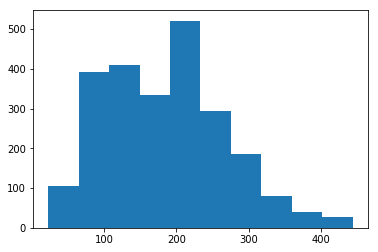

In [129]:
# I get all the values as a numpy array here
all_values = df.iloc[:,1:].values

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float) 
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = float)
print("Shape of Labels:", all_labels.shape)

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
order = np.arange(len(df))
some_materials = (df.iloc[:,0].values)[order]
some_values = all_values[order]
some_labels = all_labels[order]

# We'll use this for the splitting of our data in to training and testing
length = int(np.rint(0.10*len(df)))

# Training Set
train_labels = some_labels[:(len(df) - length)]
train_values = some_values[:(len(df) - length)]

# Testing Set
test_labels = some_labels[-length:]
test_values = some_values[-length:]

# This line is used for labels in the plots
labeled_materials = [some_materials[x] for x in order[(len(df)-length):]] 
materials = [some_materials[x] for x in order]

# NORMALIZATION

mean = np.mean(train_values, axis = 0) # mean
std = np.std(train_values, axis = 0) # standard deviation

train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

print(train_values[0]) # print a sample entry from the training set

# Here is the average and standard devation of the hardness for reference (uncomment if you wish to see them)
hardness_avg = np.mean(all_labels)
hardness_std = np.std(all_labels)
print(hardness_avg) 
print(hardness_std)

# Uncomment if you want to see a distribution of the hardness values
plt.hist(all_labels)

# Node Optimization

In [12]:
# Now, we want to see what number of nodes will work best for our model using two layers

# For layer 1, we'll test a range from 10 to 42 nodes, skipping by two's 
nodes_1 = list(range(10,42,2))

# For layer 2, we'll test a range from 4 to 30 nodes, also skipping by two's
nodes_2 = list(range(4,30,2))

# How long the outer loop will be for the nodes in layer 1
node1_end = len(nodes_1)

# How long the inner loop will be for the nodes in layer 2
node2_end = len(nodes_2)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
node_values = []

# Open a file to which we will write our output
v_file = open("rms_values_tanh.csv", "w")

# Counting variables
i = 0
j = 0

In [13]:
# Nodes Test for Tanh
while i < node1_end:
    j = 0
    while j < node2_end:    
        # open file
        v_file = open("node_values_tanh.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(nodes_1[i], activation='tanh', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
        model.add(Dense(nodes_2[j], activation='tanh', kernel_initializer=kernel_init))
        model.add(Dense(1, kernel_initializer=kernel_init))

        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(0.0015) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        node_values.append([nodes_1[i], nodes_2[j],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        print("The current iteration of j is \n" ,j)

        # write to a file
        v_file.write(" ".join(str(x) for x in node_values[i*node2_end + j]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in node_values[i*node2_end + j]))

        # counting variable
        j = j + 1
    
        # Close the file    
        v_file.close()
    
    # Counting variable
    i = i + 1

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
The current iteration of i is 
 0
The current iteration of j is 
 0
10 4 110.407 125.051
The current iteration of i is 
 0
The current iteration of j is 
 1
10 6 87.272 98.619
The current iteration of i is 
 0
The current iteration of j is 
 2
10 8 75.208 79.681
The current iteration of i is 
 0
The current iteration of j is 
 3
10 10 59.914 66.277
The current iteration of i is 
 0
The current iteration of j is 
 4
10 12 53.621 55.858
The current iteration of i is 
 0
The current iteration of j is 
 5
10 14 49.055 47.626
Restoring model weights from the end of the best epoch.
Epoch 09944: early stopping
The current iteration of i is 
 0
The current iteration of j is 
 6
10 16 42.211 48.103
The current iteration of i is 
 0
The current iteration of j is 
 7
10 18 42.513 46.655
The current iteration of i is 
 0
The current iteration of j is 
 8
10 20 36.588 43.409
The c

The current iteration of i is 
 5
The current iteration of j is 
 7
20 18 71.451 61.22
The current iteration of i is 
 5
The current iteration of j is 
 8
20 20 71.451 61.22
The current iteration of i is 
 5
The current iteration of j is 
 9
20 22 71.451 61.221
The current iteration of i is 
 5
The current iteration of j is 
 10
20 24 71.45 61.208
The current iteration of i is 
 5
The current iteration of j is 
 11
20 26 71.45 61.207
The current iteration of i is 
 5
The current iteration of j is 
 12
20 28 71.451 61.223
The current iteration of i is 
 6
The current iteration of j is 
 0
22 4 110.685 125.861
The current iteration of i is 
 6
The current iteration of j is 
 1
22 6 88.535 98.645
The current iteration of i is 
 6
The current iteration of j is 
 2
22 8 97.59 133.524
The current iteration of i is 
 6
The current iteration of j is 
 3
22 10 72.333 65.86
The current iteration of i is 
 6
The current iteration of j is 
 4
22 12 95.899 132.555
Restoring model weights from the e

Epoch 03743: early stopping
The current iteration of i is 
 11
The current iteration of j is 
 11
32 26 98.173 137.145
The current iteration of i is 
 11
The current iteration of j is 
 12
32 28 71.45 61.207
The current iteration of i is 
 12
The current iteration of j is 
 0
34 4 113.494 125.8
The current iteration of i is 
 12
The current iteration of j is 
 1
34 6 91.754 98.655
The current iteration of i is 
 12
The current iteration of j is 
 2
34 8 97.528 133.525
The current iteration of i is 
 12
The current iteration of j is 
 3
34 10 72.334 65.864
The current iteration of i is 
 12
The current iteration of j is 
 4
34 12 95.906 132.561
The current iteration of i is 
 12
The current iteration of j is 
 5
34 14 95.831 132.554
The current iteration of i is 
 12
The current iteration of j is 
 6
34 16 95.83 132.554
The current iteration of i is 
 12
The current iteration of j is 
 7
34 18 95.809 132.554
The current iteration of i is 
 12
The current iteration of j is 
 8
34 20 47.8

In [146]:
# Now, we want to see what number of nodes will work best for our model using two layers for leaky relu

# For layer 1, we'll test a range from 10 to 42 nodes, skipping by two's 
nodes_1 = list(range(10,42,2))

# For layer 2, we'll test a range from 4 to 30 nodes, also skipping by two's
nodes_2 = list(range(4,30,2))

# How long the outer loop will be for the nodes in layer 1
node1_end = len(nodes_1)

# How long the inner loop will be for the nodes in layer 2
node2_end = len(nodes_2)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
node_values = []

# Open a file to which we will write our output
v_file = open("rms_values_lrelu.csv", "w")

# Counting variables
i = 0
j = 0

from keras.layers import LeakyReLU

In [147]:
# Nodes Test for Leaky Relu
while i < node1_end:
    j = 0
    while j < node2_end:    
        # open file
        v_file = open("node_values_lrelu.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(nodes_1[i]))
        model.add(LeakyReLU(alpha=0.05))
        model.add(Dense(nodes_2[j]))
        model.add(LeakyReLU(alpha=0.05))
        model.add(Dense(1, kernel_initializer=kernel_init))

        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(0.0015) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        node_values.append([nodes_1[i], nodes_2[j],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        print("The current iteration of j is \n" ,j)

        # write to a file
        v_file.write(" ".join(str(x) for x in node_values[i*node2_end + j]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in node_values[i*node2_end + j]))

        # counting variable
        j = j + 1
    
        # Close the file    
        v_file.close()
    
    # Counting variable
    i = i + 1

Restoring model weights from the end of the best epoch.
Epoch 01737: early stopping
The current iteration of i is 
 0
The current iteration of j is 
 0
10 4 48.073 50.158
Restoring model weights from the end of the best epoch.
Epoch 01800: early stopping
The current iteration of i is 
 0
The current iteration of j is 
 1
10 6 47.288 48.762
Restoring model weights from the end of the best epoch.
Epoch 01503: early stopping
The current iteration of i is 
 0
The current iteration of j is 
 2
10 8 48.389 48.383
Restoring model weights from the end of the best epoch.
Epoch 01449: early stopping
The current iteration of i is 
 0
The current iteration of j is 
 3
10 10 50.352 50.283
Restoring model weights from the end of the best epoch.
Epoch 01372: early stopping
The current iteration of i is 
 0
The current iteration of j is 
 4
10 12 49.693 50.701
Restoring model weights from the end of the best epoch.
Epoch 01432: early stopping
The current iteration of i is 
 0
The current iteration of 

Restoring model weights from the end of the best epoch.
Epoch 01007: early stopping
The current iteration of i is 
 3
The current iteration of j is 
 9
16 22 50.08 54.2
Restoring model weights from the end of the best epoch.
Epoch 01067: early stopping
The current iteration of i is 
 3
The current iteration of j is 
 10
16 24 49.007 49.348
Restoring model weights from the end of the best epoch.
Epoch 00900: early stopping
The current iteration of i is 
 3
The current iteration of j is 
 11
16 26 49.632 50.602
Restoring model weights from the end of the best epoch.
Epoch 00980: early stopping
The current iteration of i is 
 3
The current iteration of j is 
 12
16 28 49.414 52.594
Restoring model weights from the end of the best epoch.
Epoch 01460: early stopping
The current iteration of i is 
 4
The current iteration of j is 
 0
18 4 49.778 51.942
Restoring model weights from the end of the best epoch.
Epoch 01378: early stopping
The current iteration of i is 
 4
The current iteration o

Restoring model weights from the end of the best epoch.
Epoch 01052: early stopping
The current iteration of i is 
 7
The current iteration of j is 
 5
24 14 49.573 52.317
Restoring model weights from the end of the best epoch.
Epoch 00960: early stopping
The current iteration of i is 
 7
The current iteration of j is 
 6
24 16 49.61 55.575
Restoring model weights from the end of the best epoch.
Epoch 01038: early stopping
The current iteration of i is 
 7
The current iteration of j is 
 7
24 18 49.568 53.831
Restoring model weights from the end of the best epoch.
Epoch 00977: early stopping
The current iteration of i is 
 7
The current iteration of j is 
 8
24 20 50.009 55.052
Restoring model weights from the end of the best epoch.
Epoch 00979: early stopping
The current iteration of i is 
 7
The current iteration of j is 
 9
24 22 49.827 52.825
Restoring model weights from the end of the best epoch.
Epoch 00960: early stopping
The current iteration of i is 
 7
The current iteration o

Restoring model weights from the end of the best epoch.
Epoch 01105: early stopping
The current iteration of i is 
 11
The current iteration of j is 
 1
32 6 48.885 52.269
Restoring model weights from the end of the best epoch.
Epoch 01026: early stopping
The current iteration of i is 
 11
The current iteration of j is 
 2
32 8 50.043 53.862
Restoring model weights from the end of the best epoch.
Epoch 01169: early stopping
The current iteration of i is 
 11
The current iteration of j is 
 3
32 10 49.78 52.918
Restoring model weights from the end of the best epoch.
Epoch 01011: early stopping
The current iteration of i is 
 11
The current iteration of j is 
 4
32 12 49.997 54.332
Restoring model weights from the end of the best epoch.
Epoch 00970: early stopping
The current iteration of i is 
 11
The current iteration of j is 
 5
32 14 50.184 56.147
Restoring model weights from the end of the best epoch.
Epoch 00863: early stopping
The current iteration of i is 
 11
The current iterati

The current iteration of i is 
 14
The current iteration of j is 
 9
38 22 49.528 53.444
Restoring model weights from the end of the best epoch.
Epoch 00829: early stopping
The current iteration of i is 
 14
The current iteration of j is 
 10
38 24 49.7 54.048
Restoring model weights from the end of the best epoch.
Epoch 00802: early stopping
The current iteration of i is 
 14
The current iteration of j is 
 11
38 26 49.428 53.351
Restoring model weights from the end of the best epoch.
Epoch 00717: early stopping
The current iteration of i is 
 14
The current iteration of j is 
 12
38 28 49.927 52.661
Restoring model weights from the end of the best epoch.
Epoch 01054: early stopping
The current iteration of i is 
 15
The current iteration of j is 
 0
40 4 48.57 50.802
Restoring model weights from the end of the best epoch.
Epoch 01104: early stopping
The current iteration of i is 
 15
The current iteration of j is 
 1
40 6 49.771 53.812
Restoring model weights from the end of the best

In [ ]:
# Now, we want to see what number of nodes will work best for our model using two layers for Relu

# For layer 1, we'll test a range from 10 to 42 nodes, skipping by two's 
nodes_1 = list(range(10,42,2))

# For layer 2, we'll test a range from 4 to 30 nodes, also skipping by two's
nodes_2 = list(range(4,30,2))

# How long the outer loop will be for the nodes in layer 1
node1_end = len(nodes_1)

# How long the inner loop will be for the nodes in layer 2
node2_end = len(nodes_2)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
node_values = []

# Open a file to which we will write our output
v_file = open("node_values_relu.csv", "w")

# Counting variables
i = 0
j = 0

In [ ]:
# Nodes Test for Relu
while i < node1_end:
    j = 0
    while j < node2_end:    
        # open file
        v_file = open("node_values_relu.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(nodes_1[i], activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
        model.add(Dense(nodes_2[j], activation='relu', kernel_initializer=kernel_init))
        model.add(Dense(1, kernel_initializer=kernel_init))

        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(0.0015) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        node_values.append([nodes_1[i], nodes_2[j],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        print("The current iteration of j is \n" ,j)

        # write to a file
        v_file.write(" ".join(str(x) for x in node_values[i*node2_end + j]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in node_values[i*node2_end + j]))

        # counting variable
        j = j + 1
    
        # Close the file    
        v_file.close()
    
    # Counting variable
    i = i + 1

In [ ]:
# Now, we want to see what number of nodes will work best for our model using two layers (Sigmoid)

# For layer 1, we'll test a range from 10 to 42 nodes, skipping by two's 
nodes_1 = list(range(10,42,2))

# For layer 2, we'll test a range from 4 to 30 nodes, also skipping by two's
nodes_2 = list(range(4,30,2))

# How long the outer loop will be for the nodes in layer 1
node1_end = len(nodes_1)

# How long the inner loop will be for the nodes in layer 2
node2_end = len(nodes_2)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
node_values = []

# Open a file to which we will write our output
v_file = open("node_values_sigmoid.csv", "w")

# Counting variables
i = 0
j = 0

In [ ]:
# Nodes Test for Sigmoid
while i < node1_end:
    j = 0
    while j < node2_end:    
        # open file
        v_file = open("node_values_sigmoid.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(nodes_1[i], activation='sigmoid', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
        model.add(Dense(nodes_2[j], activation='sigmoid', kernel_initializer=kernel_init))
        model.add(Dense(1, kernel_initializer=kernel_init))

        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(0.0015) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        node_values.append([nodes_1[i], nodes_2[j],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        print("The current iteration of j is \n" ,j)

        # write to a file
        v_file.write(" ".join(str(x) for x in node_values[i*node2_end + j]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in node_values[i*node2_end + j]))

        # counting variable
        j = j + 1
    
        # Close the file    
        v_file.close()
    
    # Counting variable
    i = i + 1

In [283]:
# Let's see what we got
tanh_node_data = np.loadtxt(open("node_values_tanh.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

tanh_node_df = pd.DataFrame(tanh_node_data, columns = ['layer_1_nodes', 'layer_2_nodes', 'mae_train', 'mae_test'])
tanh_node_df.iloc[:,:] = tanh_node_df.iloc[:,:].apply(pd.to_numeric)

tanh_node_df.sort_values(by = 'mae_test', ascending = True).head()

,layer_1_nodes,layer_2_nodes,mae_train,mae_test
63,18.0,26.0,31.017,42.348
86,22.0,20.0,36.383,42.350
59,18.0,18.0,36.907,43.058
8,10.0,20.0,36.588,43.409
24,12.0,26.0,34.458,43.511


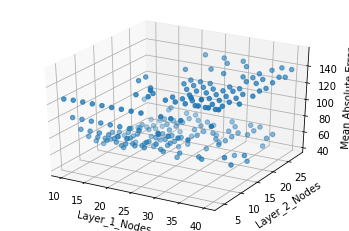

In [284]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(tanh_node_df['layer_1_nodes'], tanh_node_df['layer_2_nodes'], tanh_node_df['mae_test'])
threedee.set_xlabel('Layer_1_Nodes')
threedee.set_ylabel('Layer_2_Nodes')
threedee.set_zlabel('Mean Absolute Error')
plt.show()

In [95]:
# Let's see what we got
sigmoid_data = np.loadtxt(open("node_values_sigmoid.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

sigmoid_df = pd.DataFrame(sigmoid_data, columns = ['layer_1_nodes', 'layer_2_nodes', 'mae_train', 'mae_test'])
sigmoid_df.iloc[:,:] = sigmoid_df.iloc[:,:].apply(pd.to_numeric)

sigmoid_df.sort_values(by = 'mae_test', ascending = True).head()

,layer_1_nodes,layer_2_nodes,mae_train,mae_test
178,36.0,22.0,30.768,39.002
128,28.0,26.0,28.465,40.238
138,30.0,20.0,32.379,40.745
137,30.0,18.0,34.527,40.767
194,38.0,28.0,30.021,40.941


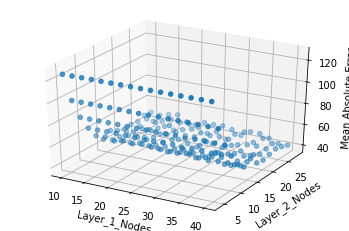

In [282]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(sigmoid_df['layer_1_nodes'], sigmoid_df['layer_2_nodes'], sigmoid_df['mae_test'])
threedee.set_xlabel('Layer_1_Nodes')
threedee.set_ylabel('Layer_2_Nodes')
threedee.set_zlabel('Mean Absolute Error')
plt.show()

In [278]:
# Let's see what we got for leaky relu
lrelu_data = np.loadtxt(open("node_values_lrelu.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

lrelu_node_df = pd.DataFrame(lrelu_data, columns = ['layer_1_nodes', 'layer_2_nodes', 'mae_train', 'mae_test'])
lrelu_node_df.iloc[:,:] = lrelu_node_df.iloc[:,:].apply(pd.to_numeric)

lrelu_node_df.sort_values(by = 'mae_test', ascending = True).head()

,layer_1_nodes,layer_2_nodes,mae_train,mae_test
2,10.0,8.0,48.389,48.383
1,10.0,6.0,47.288,48.762
25,12.0,28.0,48.278,48.774
49,16.0,24.0,49.007,49.348
14,12.0,6.0,50.324,50.062


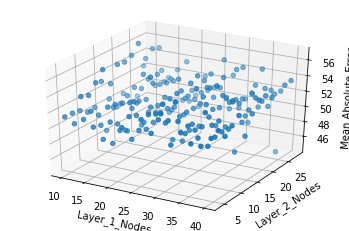

In [280]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(lrelu_node_df['layer_1_nodes'], lrelu_node_df['layer_2_nodes'], relu_node_df['mae_test'])
threedee.set_xlabel('Layer_1_Nodes')
threedee.set_ylabel('Layer_2_Nodes')
threedee.set_zlabel('Mean Absolute Error')
plt.show()

In [267]:
# Now for relu
relu_data = np.loadtxt(open("node_values_relu.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

relu_node_df = pd.DataFrame(relu_data, columns = ['layer_1_nodes', 'layer_2_nodes', 'mae_train', 'mae_test'])
relu_node_df.iloc[:,:] = relu_df.iloc[:,:].apply(pd.to_numeric)

relu_df.sort_values(by = 'mae_test', ascending = True).head()

,layer_1_nodes,layer_2_nodes,mae_train,mae_test
63,18,26,40.799,44.692
205,40,24,39.861,45.17
187,38,14,39.716,47.575
166,34,24,41.573,48.368
29,14,10,45.464,48.541


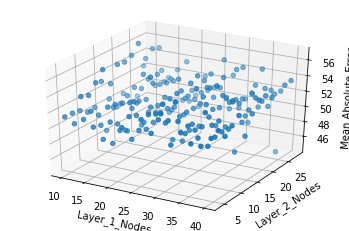

In [281]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(relu_node_df['layer_1_nodes'], relu_node_df['layer_2_nodes'], relu_node_df['mae_test'])
threedee.set_xlabel('Layer_1_Nodes')
threedee.set_ylabel('Layer_2_Nodes')
threedee.set_zlabel('Mean Absolute Error')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

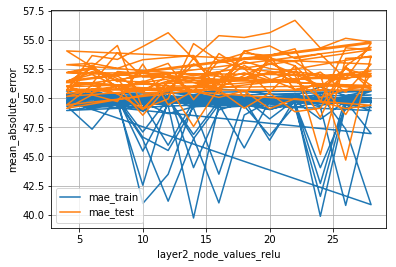

In [258]:
plt.plot(relu_node_df['layer_2_nodes'], relu_node_df['mae_train'], label = 'mae_train')
plt.plot(relu_node_df['layer_2_nodes'], relu_node_df['mae_test'], label = 'mae_test')
plt.xlabel('layer2_node_values_relu')
plt.ylabel('mean_absolute_error')
plt.grid(True)
plt.legend()
plt.show

# Learning Rate Optimization

In [25]:
# Now, I'm going to optimize for the root-mean-square propagation (learning rate) for tanh
# Notice that I change the node values to be whatever is optimal for the function type

# We'll test a range of values from , skipping by two's 
rms_list = [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2]

# How long the outer loop will be for the rms values
rms_end = len(rms_list)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
rms_values = []

# Open a file to which we will write our output
v_file = open("rms_values_tanh.csv", "w")

# Counting variables
i = 0

In [26]:
# RMS Test tanh
while i < rms_end:   
        # open file
        v_file = open("rms_values_tanh.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(22, activation='tanh', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
        model.add(Dense(20, activation='tanh', kernel_initializer=kernel_init))
        model.add(Dense(1, kernel_initializer=kernel_init))

        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(rms_list[i]) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        rms_values.append([rms_list[i],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        
        # write to a file
        v_file.write(" ".join(str(x) for x in rms_values[i]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in rms_values[i]))

        # counting variable
        i = i + 1
    
        # Close the file    
        v_file.close()

The current iteration of i is 
 0
0.001 55.06 50.97
Restoring model weights from the end of the best epoch.
Epoch 06856: early stopping
The current iteration of i is 
 1
0.002 36.201 44.235
Restoring model weights from the end of the best epoch.
Epoch 03754: early stopping
The current iteration of i is 
 2
0.004 39.949 43.488
Restoring model weights from the end of the best epoch.
Epoch 02575: early stopping
The current iteration of i is 
 3
0.006 44.484 45.259
Restoring model weights from the end of the best epoch.
Epoch 01885: early stopping
The current iteration of i is 
 4
0.008 40.75 45.842
Restoring model weights from the end of the best epoch.
Epoch 01256: early stopping
The current iteration of i is 
 5
0.01 46.231 45.836
Restoring model weights from the end of the best epoch.
Epoch 00868: early stopping
The current iteration of i is 
 6
0.02 41.709 45.007
Restoring model weights from the end of the best epoch.
Epoch 00437: early stopping
The current iteration of i is 
 7
0.04 

In [78]:
# Now, let's do the same for sigmoid

# We'll test a range of values from , skipping by two's 
rms_list = [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2]

# How long the outer loop will be for the rms values
rms_end = len(rms_list)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
rms_values = []

# Open a file to which we will write our output
v_file = open("rms_values_sigmoid.csv", "w")

# Counting variables
i = 0

In [79]:
# RMS Test for Sigmoid
while i < rms_end:   
        # open file
        v_file = open("rms_values_sigmoid.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(36, activation='sigmoid', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
        model.add(Dense(22, activation='sigmoid', kernel_initializer=kernel_init))
        model.add(Dense(1, kernel_initializer=kernel_init))

        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(rms_list[i]) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        rms_values.append([rms_list[i],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        
        # write to a file
        v_file.write(" ".join(str(x) for x in rms_values[i]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in rms_values[i]))

        # counting variable
        i = i + 1
    
        # Close the file    
        v_file.close()

The current iteration of i is 
 0
0.001 48.56 50.078
Restoring model weights from the end of the best epoch.
Epoch 08533: early stopping
The current iteration of i is 
 1
0.002 28.093 41.568
Restoring model weights from the end of the best epoch.
Epoch 04196: early stopping
The current iteration of i is 
 2
0.004 32.107 45.332
Restoring model weights from the end of the best epoch.
Epoch 02763: early stopping
The current iteration of i is 
 3
0.006 35.568 43.256
Restoring model weights from the end of the best epoch.
Epoch 02624: early stopping
The current iteration of i is 
 4
0.008 34.214 42.295
Restoring model weights from the end of the best epoch.
Epoch 00996: early stopping
The current iteration of i is 
 5
0.01 55.605 50.444
Restoring model weights from the end of the best epoch.
Epoch 00999: early stopping
The current iteration of i is 
 6
0.02 37.734 47.821
Restoring model weights from the end of the best epoch.
Epoch 00460: early stopping
The current iteration of i is 
 7
0.0

In [291]:
# Now, let's do the same for sigmoid

# We'll test a range of values from , skipping by two's 
rms_list = [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2]

# How long the outer loop will be for the rms values
rms_end = len(rms_list)

# Create an empty list to which we'll add our final values
# This should be a list containing first the layer 1 node value, then the layer 2 node value, then the MAE train value, then the MAE test value
rms_values = []

# Open a file to which we will write our output
v_file = open("rms_values_lrelu.csv", "w")

# Counting variables
i = 0
from keras.layers import LeakyReLU

In [292]:
# RMS Test for Leaky Relu
while i < rms_end:   
        # open file
        v_file = open("rms_values_lrelu.csv", "a")
        
        # DEFINITION OF THE MODEL

        # The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
        kernel_init = initializers.RandomNormal(seed=0)

        model = Sequential()
        model.add(Dense(10))
        model.add(LeakyReLU(alpha=0.05))
        model.add(Dense(8))
        model.add(LeakyReLU(alpha=0.05))
        model.add(Dense(1, kernel_initializer=kernel_init))
        # DEFINITION OF THE OPTIMIZER

        optimizer = tf.train.RMSPropOptimizer(rms_list[i]) # Root Mean Squared Propagation

        # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
        # model.summary() # Comment this out if you don't want to see the model summary

        class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
            def on_epoch_end(self, epoch, logs):
                sys.stdout.flush()
                sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

        mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10, verbose=1, mode='auto', restore_best_weights=True)    
        EPOCHS = 10000 # Number of EPOCHS

        # HISTORY Object which contains how the model learned
        # Training Values (Properties), Training Labels (Known Young's Moduli)
        history = model.fit(train_values, train_labels, batch_size = train_values.shape[0], 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


        [loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
        [loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)

        # Here is where we append the node, mae train, and mae test values
        rms_values.append([rms_list[i],round(mae_train, 3), round(mae_test, 3)])
    
        # Display the current iteration
        print("The current iteration of i is \n" ,i)
        
        # write to a file
        v_file.write(" ".join(str(x) for x in rms_values[i]))
        v_file.write("\n")
    
        # Display the same information being written to the file
        print(" ".join(str(x) for x in rms_values[i]))

        # counting variable
        i = i + 1
    
        # Close the file    
        v_file.close()

Restoring model weights from the end of the best epoch.
Epoch 01831: early stopping
The current iteration of i is 
 0
0.001 50.766 51.43
Restoring model weights from the end of the best epoch.
Epoch 01175: early stopping
The current iteration of i is 
 1
0.002 50.629 53.432
Restoring model weights from the end of the best epoch.
Epoch 00498: early stopping
The current iteration of i is 
 2
0.004 51.397 53.349
Restoring model weights from the end of the best epoch.
Epoch 00296: early stopping
The current iteration of i is 
 3
0.006 51.282 52.741
Restoring model weights from the end of the best epoch.
Epoch 00252: early stopping
The current iteration of i is 
 4
0.008 51.935 54.559
Restoring model weights from the end of the best epoch.
Epoch 00234: early stopping
The current iteration of i is 
 5
0.01 51.237 53.383
Restoring model weights from the end of the best epoch.
Epoch 00124: early stopping
The current iteration of i is 
 6
0.02 51.753 54.229
Restoring model weights from the end 

In [ ]:
# Let's see what we got for rms values for leaky relu
rms_lrelu_data = np.loadtxt(open("rms_values_lrelu.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

rms_lreludf = pd.DataFrame(rms_lrelu_data, columns = ['rms_values_lrelu', 'mae_train', 'mae_test'])
rms_lreludf.iloc[:,:] = rms_lreludf.iloc[:,:].apply(pd.to_numeric)

rms_lreludf.sort_values(by = 'mae_test', ascending = True).head()

In [80]:
# Let's see what we got for rms values for tanh
rms_tanh_data = np.loadtxt(open("rms_values_tanh.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

rms_tanhdf = pd.DataFrame(rms_tanh_data, columns = ['rms_values_tanh', 'mae_train', 'mae_test'])
rms_tanhdf.iloc[:,:] = rms_tanhdf.iloc[:,:].apply(pd.to_numeric)

rms_tanhdf.sort_values(by = 'mae_test', ascending = True).head()

,rms_values_tanh,mae_train,mae_test
8,0.060,40.453,43.024
7,0.040,38.505,43.229
2,0.004,39.949,43.488
10,0.100,41.555,43.962
1,0.002,36.201,44.235


In [81]:
# Let's see what we got for rms values for sigmoid
rms_sig_data = np.loadtxt(open("rms_values_sigmoid.csv", "r"), delimiter = ' ', dtype = str, skiprows = 0)

rms_sigdf = pd.DataFrame(rms_sig_data, columns = ['rms_values_sigmoid', 'mae_train', 'mae_test'])
rms_sigdf.iloc[:,:] = rms_sigdf.iloc[:,:].apply(pd.to_numeric)

rms_sigdf.sort_values(by = 'mae_test', ascending = True).head()

,rms_values_sigmoid,mae_train,mae_test
1,0.002,28.093,41.568
4,0.008,34.214,42.295
3,0.006,35.568,43.256
2,0.004,32.107,45.332
7,0.040,41.488,45.845


<function matplotlib.pyplot.show(*args, **kw)>

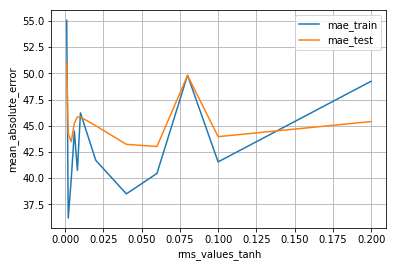

In [252]:
# Now, we can analyze the results of the optimization
# First, I'll graph the mae test and train results versus the validation split values
plt.plot(rms_tanhdf['rms_values_tanh'], rms_tanhdf['mae_train'], label = 'mae_train')
plt.plot(rms_tanhdf['rms_values_tanh'], rms_tanhdf['mae_test'], label = 'mae_test')
plt.xlabel('rms_values_tanh')
plt.ylabel('mean_absolute_error')
plt.grid(True)
plt.legend()
plt.show

# Plotting

In [82]:
# PLOTTING

test_predictions = model.predict(test_values).flatten()
'''
print("Materials in Test Set: ", labeled_materials)
print("Real Values", list(test_labels))
print("Predictions", list(test_predictions))
'''
values = np.concatenate((train_values, test_values), axis=0) # This line joins the values together to evaluate all of them
predictions = model.predict(values).flatten()

In [83]:
# PLOTTING
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "Hardness", hovermode= 'closest',
    xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
    yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2),
    showlegend= False                 
)

trace0 = go.Scatter(x = all_labels, y = predictions, mode = 'markers', marker= dict(size= 12, color= 'blue'), text= materials)
trace1 = go.Scatter(x = test_labels, y = test_predictions, mode = 'markers', marker= dict(size= 12, color= 'red'), text = labeled_materials)

#trace2 = go.Scatter(x = [0,500], y = [0,500], mode = 'lines', name = "Match") # This trace is the line X = Y which would indicate that the Prediction equals the real value

data = [trace0, trace1]
fig= go.Figure(data, layout=layout0)
iplot(fig)

In [ ]:
# Ignore this

# Redefine the element list
elements_list = list(ymdf.columns)[1:30]

# This loop will create dataframes of each property (i.e. young's modulus),
# multiply the property by the percent composition of that element,
# and store that value for each material.
# Next, the sum is taken for each row and added to the original dataframe, df
for row in range(0, len(df)):
    ymdf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    ldf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    mpdf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    shdf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    amdf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    ctedf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    eredf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    aredf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    dsedf.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
    for i in elements_list:
        # Create some arbitrary dataframes
        adf = pd.DataFrame(edf.loc[edf['element'] == i, ['youngs_modulus']])
        bdf = pd.DataFrame(edf.loc[edf['element'] == i, ['lattice_constant']])
        cdf = pd.DataFrame(edf.loc[edf['element'] == i, ['melting_point']])
        ddf = pd.DataFrame(edf.loc[edf['element'] == i, ['specific_heat']])
        fdf = pd.DataFrame(edf.loc[edf['element'] == i, ['atomic_mass']])
        gdf = pd.DataFrame(edf.loc[edf['element'] == i, ['CTE']])
        hdf = pd.DataFrame(edf.loc[edf['element'] == i, ['electrical_resistivity']])
        idf = pd.DataFrame(edf.loc[edf['element'] == i, ['atomic_radius']])
        jdf = pd.DataFrame(edf.loc[edf['element'] == i, ['density_of_solid']])
        
        # Append to the actual dataframes while multiplying by the percentage of that element
        ymdf.loc[row, i] = (df.loc[row,i])/100 * float(adf.iloc[0,0])
        ldf.loc[row, i] = (df.loc[row,i])/100 * float(bdf.iloc[0,0])
        mpdf.loc[row, i] = (df.loc[row,i])/100 * float(cdf.iloc[0,0])
        shdf.loc[row, i] = (df.loc[row,i])/100 * float(ddf.iloc[0,0])
        amdf.loc[row, i] = (df.loc[row,i])/100 * float(fdf.iloc[0,0])
        ctedf.loc[row, i] = (df.loc[row,i])/100 * float(gdf.iloc[0,0])
        eredf.loc[row, i] = (df.loc[row,i])/100 * float(hdf.iloc[0,0])
        aredf.loc[row, i] = (df.loc[row,i])/100 * float(idf.iloc[0,0])
        dsedf.loc[row, i] = (df.loc[row,i])/100 * float(jdf.iloc[0,0])
        
# Sum the rows and add them back to the original dataframe
df.loc[row, 'youngs_modulus'] = np.nansum(list(ymdf.iloc[row,1:]))
df.loc[row, 'lattice_constant'] = np.nansum(list(ldf.iloc[row,1:]))
df.loc[row, 'melting_point'] = np.nansum(list(mpdf.iloc[row,1:]))
df.loc[row, 'specific_heat'] = np.nansum(list(shdf.iloc[row,1:]))
df.loc[row, 'atomic_mass'] = np.nansum(list(amdf.iloc[row,1:]))
df.loc[row, 'CTE'] = np.nansum(list(ctedf.iloc[row,1:]))
df.loc[row, 'electrical_resistivity'] = np.nansum(list(eredf.iloc[row,1:]))
df.loc[row, 'atomic_radius'] = np.nansum(list(aredf.iloc[row,1:]))
df.loc[row, 'density_of_solid'] = np.nansum(list(dsedf.iloc[row,1:]))